## Define the Following:
### Input Layer:   inputs into the neural net
### Hidden Layer: any layer not directly connected to the input or output
### Output Layer: the layer directly connected to the output
### Neuron: see Perceptron 
### Weight: adjustable multiplier of an input
### Activation Function: function that produces output from the weighed inputs and and potentially a constant
### Node Map: arraignment of  Perceptrons and their connections
### Perceptron: input layer one or more inputs, input weights and bias layer, summing layer, and Activation Function layer
### Bias: adujstable constant added to the weighed inputs that are sent to the summing layer.

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from functools import reduce

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [6]:
class Perceptron_NAND(object):
    def __init__(self, rate=0.01, niter=10):
        self.rate = rate
        self.niter = niter
        
    def fit(self, X, y):
        self.weight = np.zeros(X.shape[1])
        self.errors = []
        self.pa = []
        min_y = 0.1
        for i in range(self.niter):

                  # Weighted sum of inputs and weights
            weighted_sum = np.dot(X, self.weight)

            # Activate with sigmoid function
            activated_output = sigmoid(weighted_sum)

            predicty = np.array([1 if a >= min_y else 0 for a in activated_output])
            # Calculate Error
            error = y - predicty        
            err = reduce((lambda sum_,e: sum_ + int(e != 0)),y - predicty,0)                    
            self.errors.append(err)

            # Calculate weight adjustments with sigmoid_derivative
            adjustments = self.rate * error * sigmoid_derivative(activated_output)

            # Update weights
            self.weight += np.dot(X.T, adjustments)                    
            self.pa.append(predicty)

        print('weights', self.weight)
        return self

    def net_input(self, X):
        return np.dot(X, self.weight)   
    
    def predict(self, X):
        return np.where(self.net_input(X) >= min_y, 1, 0)

In [7]:
X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])
y = [1, 1, 1, 0]

weights [-1.10049729 -1.10049729]


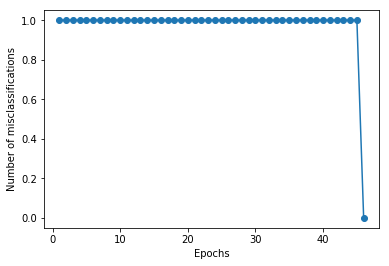

In [8]:
pn = Perceptron_NAND(0.1, 46)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [9]:
print(min(pn.errors))
index = min(range(len(pn.errors)), key=pn.errors.__getitem__)
index

0


45

In [10]:
confusion_matrix(y, pn.pa[index])

array([[1, 0],
       [0, 3]])

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv")

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.shape

(768, 9)

In [22]:
class Perceptron(object):
    def __init__(self, rate=0.01, niter=10):
        self.rate = rate
        self.niter = niter
        print('rate', rate)
        
    def fit(self, X, y):
        
        
        self.weight = np.zeros(1 + X.shape[1])
        self.errors = []
        self.pa = []
        self.min_pos = 0.0001
        for i in range(self.niter):
            err = 0
            predictions = []
        
            for xi, target in zip(X, y):
                p = self.predict(xi)
                delta_w = self.rate * (target - p)
                self.weight[1:] += delta_w * xi
                self.weight[0] = delta_w
                err += int(delta_w != 0.0)
                predictions.append(self.predict(xi))
            
#             print(f'i: {i}, weights: {self.weight}')
            
            self.pa.append(predictions)
            self.errors.append(err)
            
        print('weights', self.weight)
        return self

    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]    
    
    def predict(self, X):
        return np.where(self.net_input(X) >= self.min_pos, 1, 0)


In [23]:
y = pd.to_numeric(df.Outcome, downcast='unsigned').tolist()
X = df.drop(['Outcome', 'Pregnancies'], axis=1).values # Pregnancies not a factor

rate 1e-13
weights [ 0.00000000e+00  3.58531300e-07  1.28412300e-07  8.31157000e-08
 -2.63728000e-08  9.55335710e-07  2.74891264e-08  3.23552600e-07]


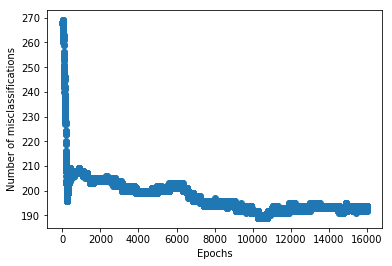

In [31]:
pn = Perceptron(1e-13, 16000)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [32]:
print(min(pn.errors))
index = min(range(len(pn.errors)), key=pn.errors.__getitem__)
index

189


10270

In [33]:
confusion_matrix(y, pn.pa[index])

array([[416,  84],
       [105, 163]])

array([[430,  70],
       [126, 142]])
of the 500 0's 430 where classified as 0 and 70 as 1
of the 268 1's 126 where classified as 0 and 142 as 1       

In [35]:
df.Outcome[df.Outcome == 1].count()

268

In [36]:
df.shape

(768, 9)

In [22]:
type(y)

list

In [30]:
count = 0
total = 0
for j in y:
    if j == 1:
        count += 1
    total += 1

In [31]:
count, total

(268, 768)

In [28]:
y[0:10]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 1]

In [29]:
type(y[0])

int